Names: Brian Bruno & Jason Santucci

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Section 1

Our data demonstrates the Unemployment and Median Household Income for the U.S., States, and Counties. This data came from the Unemployment: Bureau of Labor Statistics – LAUS data (https://www.bls.gov/lau/) and from the Median Household Income - Census Bureau - SAIPE data (https://www.census.gov/programs-surveys/saipe/data/datasets.All.html). The data was organized and prepared by USDA, Economic Research Service. Contact: Timothy Parker, Timothy.Parker@usda.gov. A sector are the 10 counties in each individual state. There are 33 states in our data. Our general research question is to determine which sector seems to have the strongest linear relationship between the median household income and the unemployment rate in the year 2017 and what other factors seem to affect the unemployment rate. We hypothesized that the Louisana counties will be the sector with the strongest relationship and perhaps the Civilian Labor Force affects the unemployment rate. 

## Section 2- Data:

#### Raw Data: 

In [3]:
unemployment_data = pd.read_csv('MG212 - Homework 2 - Unemployment Data by State and County 2007-18 (project).csv')
unemployment_data 

,State,Index_code,Area_name,CLF14,EMP14,UNEMP14,URATE14,CLF15,EMP15,UNEMP15,...,CLF17,EMP17,UNEMP17,URATE17,CLF18,EMP18,UNEMP18,URATE18,MHI17,MHI%ofState17
0,US,NaN,United States,"155,957,297","146,338,305","9,618,992",6.2,"156,866,585","148,579,026","8,287,559",...,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,60336.0,NaN
1,AL,0.0,Alabama,"2,160,842","2,014,290","146,552",6.8,"2,158,293","2,026,898","131,395",...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,48193.0,100.0
2,AL,1.0,"Autauga County, AL","25,592","24,097","1,495",5.8,"25,613","24,283","1,330",...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,58343.0,121.1
3,AL,2.0,"Baldwin County, AL","86,384","81,083","5,301",6.1,"87,741","82,882","4,859",...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,56607.0,117.5
4,AL,3.0,"Barbour County, AL","8,845","7,913",932,10.5,"8,613","7,848",765,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,32490.0,67.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,WY,7.0,"Fremont County, WY","20,533","19,513","1,020",5.0,"20,265","19,134","1,131",...,19347,18275,1072,5.5,"18,865","17,880",985,5.2,50134.0,81.8
361,WY,8.0,"Goshen County, WY","7,131","6,875",256,3.6,"7,086","6,851",235,...,6922,6723,199,2.9,"6,830","6,604",226,3.3,51023.0,83.3
362,WY,9.0,"Hot Springs County, WY","2,483","2,381",102,4.1,"2,402","2,301",101,...,2332,2241,91,3.9,"2,208","2,126",82,3.7,47775.0,78.0
363,WY,10.0,"Johnson County, WY","4,474","4,273",201,4.5,"4,206","3,999",207,...,4195,4020,175,4.2,"4,211","4,043",168,4.0,55412.0,90.4


In [11]:
unemployment_data.iloc[1:13]

,State,Index_code,Area_name,CLF14,EMP14,UNEMP14,URATE14,CLF15,EMP15,UNEMP15,...,CLF17,EMP17,UNEMP17,URATE17,CLF18,EMP18,UNEMP18,URATE18,MHI17,MHI%ofState17
1,AL,0.0,Alabama,"2,160,842","2,014,290","146,552",6.8,"2,158,293","2,026,898","131,395",...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,48193.0,100.0
2,AL,1.0,"Autauga County, AL","25,592","24,097","1,495",5.8,"25,613","24,283","1,330",...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,58343.0,121.1
3,AL,2.0,"Baldwin County, AL","86,384","81,083","5,301",6.1,"87,741","82,882","4,859",...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,56607.0,117.5
4,AL,3.0,"Barbour County, AL","8,845","7,913",932,10.5,"8,613","7,848",765,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,32490.0,67.4
5,AL,4.0,"Bibb County, AL","8,559","7,942",617,7.2,"8,576","8,009",567,...,8550,8174,376,4.4,"8,661","8,317",344,4.0,45795.0,95.0
6,AL,5.0,"Blount County, AL","24,527","23,023","1,504",6.1,"24,485","23,163","1,322",...,24725,23726,999,4.0,"25,006","24,128",878,3.5,48253.0,100.1
7,AL,6.0,"Bullock County, AL","4,732","4,314",418,8.8,"4,779","4,400",379,...,4833,4595,238,4.9,"4,776","4,552",224,4.7,29113.0,60.4
8,AL,7.0,"Butler County, AL","9,270","8,477",793,8.6,"9,138","8,444",694,...,8941,8446,495,5.5,"8,914","8,487",427,4.8,36842.0,76.4
9,AL,8.0,"Calhoun County, AL","47,237","43,467","3,770",8.0,"45,928","42,699","3,229",...,45770,43497,2273,5.0,"45,972","43,833","2,139",4.7,45937.0,95.3
10,AL,9.0,"Chambers County, AL","15,302","14,276","1,026",6.7,"14,980","14,076",904,...,15200,14579,621,4.1,"15,276","14,679",597,3.9,36883.0,76.5


#### Variables: 
* **State:** The location in the US
* **Area_name:** Displays the county in the state and the state itself
* **Index_code:** Just a way to organize the data based on states or counties
* **CLF14:** The Civilan Labor Force annual average in 2014
* **The CLF refers to the American's who are either employed or unemployed**
* **EMP14:** The Employment annual average in 2014
* **UNEMP14:** The Unemployment annual average in 2014
* **URATE14:** The Unemployment Rate in 2014
* **CLF15:** The Civilan Labor Force annual average in 2015
* **EMP15:** The Employment annual average in 2015
* **UNEMP15:** The Unemployment annual average in 2015
* **URATE15:** The Unemployment Rate in 2015
* **CLF16:** The Civilan Labor Force annual average in 2016
* **EMP16:** The Employment annual average in 2016
* **UNEMP16:** The Unemployment annual average in 2016
* **URATE16:** The Unemployment Rate in 2016
* **CLF17:** The Civilan Labor Force annual average in 2017
* **EMP17:** The Employment annual average in 2017
* **UNEMP17:** The Unemployment annual average in 2017
* **URATE17:** The Unemployment Rate in 2017
* **CLF18:** The Civilan Labor Force annual average in 2018
* **EMP18:** The Employment annual average in 2018
* **UNEMP18:** The Unemployment annual average in 2018
* **URATE18:** The Unemployment Rate in 2018
* **MHI17:** The Estimate of Median Household Income in 2017
* **MHI%ofState17:** County Household Median Income as a percent of the State Total Median Household Income, 2017

## Section 3 - Data Analysis Plan: 

**Outcome variable (response, Y):** Area_name

**Predictor variable (explanatory, X):** Unemployment Rate (2017), Median Household Income

**Comparison Groups:** Comparing the median household income and the unemployment rate, compare the employment with the unemployment rate-see if there is a relationship there. 

**Preliminary exploratory data analysis:** Determine which sector seems to have the strongest linear relationship between the median household income and the unemployment rate in the year 2017 and what other factors seem to affect the unemployment rate. Are there other factors that could possibly show a high or low unemployment rate, like, for example a high CLF? 

In [6]:
#An array of the states 
states = unemployment_data['State'].unique()
states = states[1:34]
states

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'ID', 'IN', 'IA', 'KS', 'KY',
       'LA', 'ME', 'MA', 'MI', 'MN', 'MO', 'MT', 'NE', 'NV', 'NM', 'NC',
       'ND', 'OH', 'OK', 'OR', 'TN', 'TX', 'UT', 'VT', 'WV', 'WI', 'WY'],
      dtype=object)

In [7]:
#For-loop to find the correlation of coefficient for each sector
correlation_table = pd.DataFrame()
coefficients = []
for state in states: 
    one_state_urate_mhi = unemployment_data[unemployment_data['State'] == state].iloc[1:12].sort_values(by=['MHI17', 'URATE17'])
    corr_matrix = np.corrcoef(one_state_urate_mhi['URATE17'], one_state_urate_mhi['MHI17'])
    coefficients.append(corr_matrix[0][1])
coefficients
correlation_table['State'] = states
correlation_table['Coefficients'] = coefficients
print(correlation_table)

   State  Coefficients
0     AL     -0.679719
1     AZ     -0.687528
2     AR     -0.610279
3     CA     -0.509976
4     CO      0.141796
5     FL     -0.435213
6     ID     -0.739221
7     IN     -0.600115
8     IA     -0.316979
9     KS     -0.271858
10    KY     -0.590493
11    LA     -0.634546
12    ME     -0.796249
13    MA     -0.392824
14    MI     -0.735563
15    MN     -0.672794
16    MO     -0.637529
17    MT     -0.281787
18    NE     -0.520378
19    NV     -0.377891
20    NM     -0.334520
21    NC     -0.288563
22    ND     -0.352297
23    OH     -0.852995
24    OK     -0.559592
25    OR     -0.754053
26    TN     -0.924430
27    TX     -0.455243
28    UT     -0.512335
29    VT     -0.859869
30    WV     -0.667981
31    WI     -0.726592
32    WY      0.405999


Text(0.5, 1.0, 'Unemployment Rate vs. MHI for each Sector')

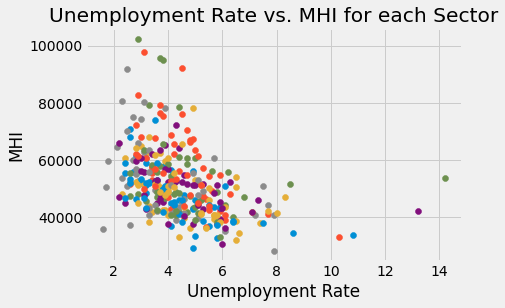

In [8]:
#A for-loop scatter-plot that demonstrates the unemployment rate vs. the median household income for each sector in 2017
for state in states: 
    one_state_urate_mhi = unemployment_data[unemployment_data['State'] == state].iloc[1:12].sort_values(by=['MHI17', 'URATE17'])
    
    plt.scatter(one_state_urate_mhi['URATE17'], one_state_urate_mhi['MHI17'])
plt.xlabel('Unemployment Rate')
plt.ylabel('MHI')
plt.title('Unemployment Rate vs. MHI for each Sector')

Text(0.5, 1.0, 'Unemployment Rate vs. MHI')

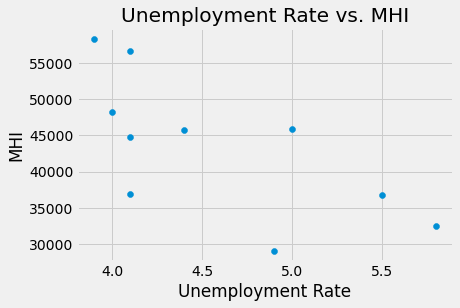

In [9]:
#Unemployment Rate vs. MHI in just one sector (Alabama) 
where_states = unemployment_data[unemployment_data['State'] == 'AL']
where_states_sorted = where_states.iloc[1:12] #Filters so that only the Alabama counties show
states_urate_mhi = where_states_sorted.sort_values(by=['MHI17', 'URATE17'])
plt.scatter(states_urate_mhi['URATE17'], states_urate_mhi['MHI17'])
plt.xlabel('Unemployment Rate')
plt.ylabel('MHI')
plt.title('Unemployment Rate vs. MHI')

After running the scatter plot we can see that the correlation of coefficeint is negative. Not only this but there is a moderate negative relationship between these two.

Scatter plots and the coefficient of correlation will be extremely helpful in answering our questions about the relationship between Unemployment rate and the MHI. Based on this example as the unemployment rate increases the MHI will decrease.